In [1]:
using Pkg

In [2]:
Pkg.activate(".")

  Activating project at `~/CELESTE/PROJECTS/ReactionDiffusion`


In [3]:
Pkg.status()

      Status `~/CELESTE/PROJECTS/ReactionDiffusion/Project.toml`


  [537997a7] 

AbstractPlotting v0.18.3
  [e9467ef8] GLMakie v0.4.5


In [4]:
# using Plots
# using Dates

In [4]:
using GLMakie

In [7]:
# scene = Scene()
# network = rand(4,4)
# heatmap!(scene, network, colormap=:plasma)
# hidedecorations!(scene[1][1])
# hidespines!(scene[2])


In [8]:
# SAVING TO MP4 
# record(scene, "color_animation.mp4", 1:100; framerate = 30) do i
#     scene[end][3][] = rand(4,4)
# end

In [9]:
# LIVE PLOTTING
# for i in 1:100
#     scene[end][3][] = rand(4,4)
#     sleep(1/30)
# end

In [10]:
# function In(X, i, j)
#     A, B = size(X)
#     ic, jc = i, j
#     if i > A
#        ic = i - A
#     elseif i < 1 
#        ic = i + A 
#     end
 
#     if j > B
#        jc =  j - B
#     elseif j < 1 
#        jc = j + B
#     end
#     return ic, jc
#  end
# function convolve(X, K)
#     C = zeros(Float64, size(X))
#     for i in 1:size(X, 1)
#         for j in 1:size(X, 2)
#             for p in 1:size(K, 1)
#                 for q in 1:size(K, 2)
#                     pn = p - (size(K, 1) ÷ 2 + 1)
#                     qn = q - (size(K, 2) ÷ 2 + 1)
#                     C[i, j] += K[p, q]*X[In(X, i + pn, j + qn)...]
#                 end
#             end  
#         end
#     end
#     return C
# end

Initial concentrations of interacting molecules on a grid, as well as parameters.

In [11]:
# Δt = 0.01
# Da = 0.005; Db = 0.2
# ρa = 0.01; ρb = 0.02

# gridx, gridy = 50, 50
# a = rand(gridx, gridy)
# b = rand(gridx, gridy);

Kernels for differentiation

In [12]:
# Kx = Float64[0 0 0;
#      -1 0 1;
#       0 0 0]
# Ky = Float64[0 1 0;
#       0 0 0;
#       0 -1 0]

Laplacians of A and B

In [13]:
# ydiff(A) = vcat(diff(A, dims=1), A[1:1, :]-A[end:end, :])
# xdiff(A) = hcat(diff(A, dims=2), A[:, 1:1]-A[:,end:end])

In [14]:
# function update(a, b)
#     ∇²a = xdiff(xdiff(a)) + ydiff(ydiff(a))
#     ∇²b = xdiff(xdiff(b)) + ydiff(ydiff(b))

#     ȧ = Da * ∇²a + ρa * (a .^2 ./ b .- a)
#     ḃ = Db * ∇²b + ρb * (a .^2 .- b)

#     a .+= ȧ*Δt
#     b .+= ḃ*Δt 
# end

In [15]:
# function conv(X::WrapMatrix, K::WrapMatrix)
#     C = WrapMatrix(zeros(size(X))
#     n, m = size(X)
#     n′, m′ = size(K)
#     for i in 1:n
#         for j in 1:m
#             for i′ in 1:n′
#                 for j′ in 1:m′
#                     C[i, j] += X[i + , j] *       
#                 end
#             end
#         end
#     end
# end 

In [16]:
# WrapMatrix tests
#=m, n = size(X)
X[1,1] == X[m+1,n+1]
X[0,1] == X[m, 1]
X[1,0] == X[1, n]
X[0,0] == X[m, n]=#

In [5]:
function getfuncname(func)
    x = typeof(func)
    y = string(x)
    funcname = split(y, '(')[end]
    funcname = split(funcname, ')')[1]
    funcname
end

getfuncname (generic function with 1 method)

In [6]:
gettime() = Dates.format(Dates.now(), "dd-mm-yyyy HH:MM:SS")

gettime (generic function with 1 method)

In [5]:
function plotTrajectory(a, b, model, scene; iter=100, skipframes=1)
	heatmap!(scene, a, colormap=:plasma)
	begin
		for i = 1:iter
			update(a, b, model)
			scene[end][3][] = a
			sleep(1/1200)		
		end
	end
end

function plotTrajectory(a, b, c, model, scene; iter=100, skipframes=1)
	heatmap!(scene, c, colormap=:plasma)
	begin
		for i = 1:iter
			update(a, b, c, model)
			scene[end][3][] = c
			sleep(1/1200)		
		end
	end
end

function plotTrajectory(a, b, c, d, model, scene; iter=100, skipframes=1)
	heatmap!(scene, c, colormap=:plasma)
	begin
		for i = 1:iter
			update(a, b, c, d, model)
			scene[end][3][] = c
			sleep(1/1200)		
		end
	end
end

plotTrajectory (generic function with 3 methods)

In [ ]:
# function saveTrajectory(scene, filename, model, frames, a, b)
#     record(scene, filename, frames; framerate=600) do frame
#         update(a, b, model)
#         scene[end][3][] = a
#     end
# end
# saveTrajectory(scene, "model1-figureb.mp4", model1, 1:10, A, B)

In [8]:
function getsteadystate(a, b, model; iter=100)
		for i = 1:iter
			update(a, b, model)
		end
    return a, b
end

getsteadystate

Convolutions approach using matrices that wrap around

In [6]:
struct WrapMatrix
    X::Matrix{Float64}
end
Base.size(x::WrapMatrix) = size(x.X)
Base.display(A::WrapMatrix) = Base.display(A.X)
Base.setindex!(X::WrapMatrix, x::Float64, i::Int64, j::Int64) = setindex!(X.X, x, i, j)
function Base.getindex(x::WrapMatrix, i::Int, j::Int)
    n,m=size(x)
    if (i > n)
        i = i % n
    elseif (i < 1)
        i = n + i % n
    end 
    if (j > m)
        j = j % m  
    elseif (j < 1)
        j = m + j % m
    end 
    x.X[i,j]
end

In [7]:
function Δ(X) 
    Δx² = 1. 
    m, n = size(X)
    X′ = WrapMatrix(X)
    ∇²X = zeros(m, n)
    for i in 1:m
        for j in 1:n
            ∇²X[i, j] += X′[i+1, j  ]
            ∇²X[i, j] += X′[i  , j+1] 
            ∇²X[i, j] += X′[i-1, j  ] 
            ∇²X[i, j] += X′[i  , j-1] 

            ∇²X[i, j] -= 4*X′[i, j] 
            ∇²X[i, j] /= Δx²
        end
    end
    return ∇²X
end

Δ (generic function with 1 method)

In [8]:
function model1(a, b)
    Da = 0.005; Db = 0.2
    ρa = 0.01; ρb = 0.02
    μa = 0.01; μb = 0.02
    Ka = 0.25
    σa = 0.0; σb = 0.0

    ∇²a = Δ(a)
    ∇²b = Δ(b)

    ȧ = Da * ∇²a + 
        ρa * (a.^ 2 ./ (1 .+ Ka * a.^2)) ./ b - 
        μa*a .+ 
        σa
    
    ḃ = Db * ∇²b + 
        ρb * a.^2 -
        μb * b .+
        σb 

    return ȧ, ḃ
end

model1 (generic function with 1 method)

In [12]:
function model2(a, b)
    Da = 0.005; Db = 0.2
    ρa = 0.01; ρb = 0.02

    ∇²a = Δ(a)
    ∇²b = Δ(b)
    
    ȧ = Da * ∇²a + ρa * (a .^2 ./ b .- a)
    ḃ = Db * ∇²b + ρb * (a .^2 .- b)

    return ȧ, ḃ
end

model2 (generic function with 1 method)

In [13]:
function model3(a, b)
    Da = 0.005; Db = 0.2
    ρa = 0.01; ρb = 0.02
    μa = 0.01
    σa = 0.0; σb = 0.02
    Ka = 0.25

    #homogeneous steady state
    # a .= ((ρa * σb / ρb ) + σa) / μa
    # b .= σb * (1 + Ka * a[1,1]^2 ) / (a[1,1] * ρb) 

    ∇²a = Δ(a)
    ∇²b = Δ(b)

    ȧ = Da * ∇²a + 
        ρa * (a.^ 2 .* b) ./ (1 .+ Ka * a.^2) - 
        μa*a .+ 
        σa
    
    ḃ = Db * ∇²b -
        ρb * (a.^ 2 .* b) ./ (1 .+ Ka * a.^2) .+
        σb 

    return ȧ, ḃ
end

model3 (generic function with 1 method)

In [14]:
function model6(a, b, c)
    Da = 0.005; Db = 0.2; Dc = 0.3;
    ρa = 0.01; ρb = 0.02; ρc = 0.01;
    μa = 0.01
    σa = 0.0; σb = 0.02
    Ka = 0.25; Kb = 0.21

    ∇²a = Δ(a)
    ∇²b = Δ(b)
    ∇²c = Δ(c)


    ȧ = @.  Da * ∇²a + 
            ρa * (c / (1 + Ka * b^2 ) - a) + 
            σa
    
    ḃ = @.  Db * ∇²b +
            ρb * (1 / (1 + Kb * a^2 * c) - b) +
            σb 

    ċ = @.  Dc * ∇²c +
            ρc * (b - a * c)

    return ȧ, ḃ, ċ
end

model6 (generic function with 1 method)

In [24]:
function model8a(a, s, y)
    Da = 0.015; Ds = 0.03
    ρa = 0.025; ρs = 0.0025; ρy = 0.03
    μa = 0.0; μs = 0.00075; μy = 0.003
    σa = 0.0; σs = 0.00225; σy = 0.00015
    Ka = 0.1; Ks = 20.0; Ky = 22.0;

    ∇²a = Δ(a)
    ∇²s = Δ(s)
    ∇²y = Δ(y)


    ȧ = @.  Da * ∇²a + 
            ρa * (a^2 * s / (1 + Ka * a^2 ) - a)
            
    ṡ = @.  Ds * ∇²s +
            σs / (1 + Ks * y)  -
            ρs * a^2 * s / (1 + Ka * a^2) -
            μs * s

    ẏ = @.  ρy * y^2 / (1 + Ky * y^2) -
            μy * y +
            σy * a 

    return ȧ, ṡ, ẏ
end

model8a (generic function with 1 method)

In [16]:
function model8b(a, s, y)
    Da = 0.01; Ds = 0.1
    ρa = 0.05; ρs = 0.0035; ρy = 0.03
    μa = 0.0; μs = 0.003; μy = 0.003
    σa = 0.0; σs = 0.0075; σy = 0.00007
    Ka = 0.5; Ks = 0.3; Ky = 22.0;

    ∇²a = Δ(a)
    ∇²s = Δ(s)
    ∇²y = Δ(y)


    ȧ = @.  Da * ∇²a + 
            ρa * (a^2 * s / (1 + Ka * a^2 ) - a)
            
    ṡ = @.  Ds * ∇²s +
            σs / (1 + Ks * y)  -
            ρs * a^2 * s / (1 + Ka * a^2) -
            μs * s

    ẏ = @.  ρy * y^2 / (1 + Ky * y^2) -
            μy * y +
            σy * a 

    return ȧ, ṡ, ẏ
end

model8b (generic function with 1 method)

In [74]:
function model8c(a, s, y)
    Da = 0.015; Ds = 0.1
    ρa = 0.025; ρs = 0.0025; ρy = 0.03
    μa = 0.0; μs = 0.00075; μy = 0.003
    σa = 0.0; σs = 0.00225; σy = 0.00015
    Ka = 0.5; Ks = 1.0 ; Ky = 22.0;

    ∇²a = Δ(a)
    ∇²s = Δ(s)
    ∇²y = Δ(y)


    ȧ = @.  Da * ∇²a + 
            ρa * (a^2 * s / (1 + Ka * a^2 ) - a)
            
    ṡ = @.  Ds * ∇²s +
            σs / (1 + Ks * y)  -
            ρs * a^2 * s / (1 + Ka * a^2) -
            μs * s

    ẏ = @.  ρy * y^2 / (1 + Ky * y^2) -
            μy * y +
            σy * a 

    return ȧ, ṡ, ẏ
end

model8c (generic function with 1 method)

In [105]:
function model9(a, s, b, h)
    Da = 0.01; Ds = 0.2; Db = 0.0075; Dh = 0.15
    ρa = 0.0025; ρs = 0.003; ρb = 0.01875; ρh = 0.0375
    σa = 0.00025; σs = 0.003; σb = 0.00187; σh = 0. 
    Ka = 0.1; Ks = 0.0 ; Kb = 0.2; Kh = 0.0

    ∇²a = Δ(a)
    ∇²s = Δ(s)
    ∇²b = Δ(b)
    ∇²h = Δ(h)


    ȧ = @.  Da * ∇²a + 
            ρa * (a^2 * s / (1 + Ka * b^2 ) - a) +
            σa
            
    ṡ = @.  Ds * ∇²s -
            ρs * a^2 * s / (1 + Ka * b^2) +
            σs

    ḃ = @.  Db * ∇²b +
            ρb * ((s^2 / (1 + Kb * a * b^2)) * (b^2 / h + σb) - b)

    ḣ = @.  Dh * ∇²h +
                ρh * (b^2 - h)

    return ȧ, ṡ, ḃ, ḣ
end

model9 (generic function with 1 method)

In [9]:
function update(a, b, model)
    Δt = 1.
    ȧ, ḃ = model(a, b)

    a .+= ȧ*Δt
    b .+= ḃ*Δt
end

function update(a, b, c, model)
    Δt = 1.
    ȧ, ḃ, ċ = model(a, b, c)

    a .+= ȧ*Δt
    b .+= ḃ*Δt
    c .+= ċ*Δt
end

update (generic function with 2 methods)

In [114]:
function update(a, b, c, d, model)
    Δt = 1.
    ȧ, ḃ, ċ, ḋ = model(a, b, c, d)

    a .+= ȧ*Δt
    b .+= ḃ*Δt
    c .+= ċ*Δt
    d .+= ḋ*Δt
end

update (generic function with 3 methods)

In [252]:
# generateAnimation(A, B, model3, iter=10000, skipframes=100)

In [32]:
# heatmap(B,
# colorbar=:none,
# aspect_ratio=:equal,
# showaxis=false,
# grid=false,
# ticks=false)

In [33]:
# getsteadystate(A, B, model1, iter=10000)

In [117]:
# Ai = rand(gridy, gridx) * 4 .+ 3
# Bi = rand(gridy, gridx) * 4 .+ 3;

In [16]:
gridx, gridy = 70, 70

Ai = rand(gridy, gridx);
Bi = rand(gridy, gridx);
Ci = zeros(gridy, gridx);
Di = zeros(gridy, gridx);

In [19]:
A = copy(Ai)
B = copy(Bi)
C = copy(Bi)
D = copy(Bi);

In [64]:
# ind = rand(1:length(A), 30);

In [82]:
# gridx, gridy = 100, 100
# A = zeros(gridy, gridx)
# B = ones(gridy, gridx)*2.5
# C = zeros(gridy, gridx)
# A[ind] .= 2;

In [469]:
# gridx, gridy = 100, 100

# A = fill(10., gridy, gridx)
# B = fill(3., gridy, gridx)
# C = fill(1., gridy, gridx)
# D = fill(4., gridy, gridx);

In [13]:
scene

In [20]:
scene = Scene()
heatmap!(scene, A, colormap=:plasma, show_axis=false)
scene

In [21]:
plotTrajectory(A, B, model1, scene; iter=2000, skipframes=1)

In [111]:
# """(Takes ~30s for 100 frames)"""
# function generateAnimation(a, b, model; iter=4000, skipframes=10)
# 	begin
# 		anim = @animate for i = 1:(iter ÷ skipframes)
# 			for j in 1:skipframes
# 				update(a, b, model)
# 			end
# 			Plots.heatmap(a,
# 			colorbar=:none,
# 			aspect_ratio=:equal,
# 			showaxis=false,
# 			grid=false,
# 			ticks=false)

# 			# Plots.heatmap(b,
# 			# colorbar=:none,
# 			# aspect_ratio=:equal,
# 			# showaxis=false,
# 			# grid=false,
# 			# ticks=false,
# 			# c=:viridis)
# 		end
# 		# gif(anim, "$(getfuncname(model)) $(gettime()).mp4", fps = 60)
# 		gif(anim, "modelX-figureY-compoundZ.gif", fps = 120)
# 	end
# end
# """(Takes ~30s for 100 frames)"""
# function generateAnimation(a, b, c, model; iter=4000, skipframes=10)
# 	begin
# 		anim = @animate for i = 1:(iter ÷ skipframes)
# 			for j in 1:skipframes
# 				update(a, b, c, model)
# 			end
# 			Plots.heatmap(c,
# 			colorbar=:none,
# 			aspect_ratio=:equal,
# 			showaxis=false,
# 			grid=false,
# 			ticks=false)

# 			# Plots.heatmap(a,
# 			# colorbar=:none,
# 			# aspect_ratio=:equal,
# 			# showaxis=false,
# 			# grid=false,
# 			# ticks=false,
# 			# c=:viridis)

# 			# Plots.heatmap(b,
# 			# colorbar=:none,
# 			# aspect_ratio=:equal,
# 			# showaxis=false,
# 			# grid=false,
# 			# ticks=false,
# 			# c=:viridis)
# 		end
# 		# gif(anim, "$(getfuncname(model)) $(gettime()).mp4", fps = 60)
# 		gif(anim, "modelX-figureY-compoundZ.gif", fps = 120)
	# end
# end

"""(Takes ~30s for 100 frames)"""
function generateAnimation(a, b, c, d, model; iter=4000, skipframes=10)
	begin
		anim = @animate for i = 1:(iter ÷ skipframes)
			for j in 1:skipframes
				update(a, b, c, d, model)
			end
			Plots.heatmap(b,
			colorbar=:none,
			aspect_ratio=:equal,
			showaxis=false,
			grid=false,
			ticks=false)

			# Plots.heatmap(b,
			# colorbar=:none,
			# aspect_ratio=:equal,
			# showaxis=false,
			# grid=false,
			# ticks=false,
			# c=:viridis)
		end
		# gif(anim, "$(getfuncname(model)) $(gettime()).mp4", fps = 60)
		gif(anim, "modelX-figureY-compoundZ.gif", fps = 120)
	end
end

generateAnimation

┌ Info: Saved animation to 
│   fn = /home/sharon/CELESTE/PROJECTS/ReactionDiffusion/modelX-figureY-compoundZ.gif
└ @ Plots /home/sharon/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/sharon/CELESTE/PROJECTS/ReactionDiffusion/modelX-figureY-compoundZ.gif")
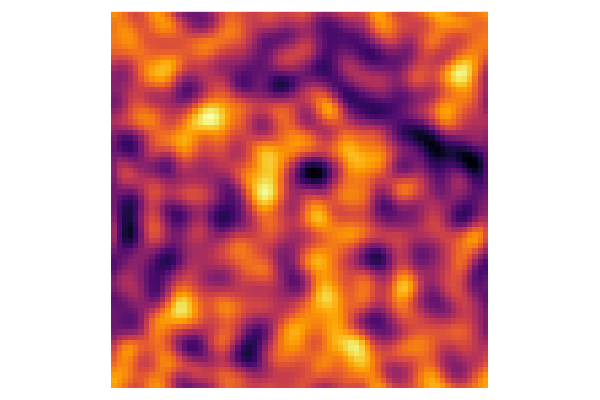

In [112]:
generateAnimation(A, B, C, D, model9)